***
<p align="right">
      <img src="https://www.dkrz.de/@@site-logo/dkrz.svg" width="12%" align="right" title="DKRZlogo" hspace="20">
      <img src="https://wr.informatik.uni-hamburg.de/_media/logo.png" width="12%" align="right" title="UHHLogo">
</p>
<div style="font-size: 20px" align="center"><b> Python Course for Geoscientists, 9-12 October 2023</b></div>
<div style="font-size: 15px" align="center">
    <b>see also <a href="https://gitlab.dkrz.de/pythoncourse/material">https://gitlab.dkrz.de/pythoncourse/material</a></b>
</div>

***

<p align="right">
      <img src="https://docs.xarray.dev/en/stable/_static/dataset-diagram-logo.png" width="30%" align="right" title="xarray logo" hspace="20">
</p>
<div style="font-size: 28px" align="center"><b> Introduction into Xarray I</b></div>
<div style="font-size: 10px" align="center"><b> licensed by DKRZ under CC BY-NC-ND 4.0</b></div>
<br>

Xarray home page: https://xarray.pydata.org/en/stable/index.html <br>
Xarray documentation: https://docs.xarray.dev/en/stable/index.html


# How to create a Xarray DataSet with two 3D data variables 

## Importing required libraries

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import os, datetime

### Define your fake data

as lists for the coordinate variables of time, lat, lon

In [2]:
time = ['2023-01-01', '2023-01-02']
lat  = [45.,50.,55.,60.]
lon  = [0.,5.,10.,15.,20.]

as random 3D numpy ndarray representing your dummmy data

In [3]:
mydata1 = np.random.uniform(250,300,40).reshape((len(time),len(lat),len(lon)))

### Create the first xarray DataArray (i.e. the first variable)

This is done by converting the ndarray dummy data plus the coordinate variables to an xarray DataArray  
Coordinates are added as dictionary in a key:value manner

In [4]:
da1 = xr.DataArray(data=mydata1,
                   coords={'time':  time,
                           'lat':   lat,
                           'lon':   lon,
                           },
                   name='temp',
                   attrs={'units': 'K', 'standard_name':'surface_temperature'})

#### Check the DataArray by printing

In [5]:
da1

<xarray.DataArray 'temp' (time: 2, lat: 4, lon: 5)>
array([[[292.26773702, 265.98432688, 290.57144698, 261.4455107 ,
         267.10028742],
        [281.50167973, 273.30481358, 266.87359285, 299.49650081,
         253.2315784 ],
        [254.16992445, 251.95247633, 270.76799469, 259.97650719,
         289.31243171],
        [282.79771876, 264.43478803, 260.50205139, 250.47371425,
         250.8244255 ]],

       [[265.41327346, 275.31406289, 251.84136738, 253.70406739,
         266.07577294],
        [250.25539756, 273.15367259, 274.24760139, 271.0449651 ,
         273.2598477 ],
        [260.19315986, 297.7809905 , 279.57672522, 285.97109257,
         262.86998454],
        [282.60551554, 261.39996982, 295.69088021, 298.94775813,
         256.68318152]]])
Coordinates:
  * time     (time) <U10 '2023-01-01' '2023-01-02'
  * lat      (lat) float64 45.0 50.0 55.0 60.0
  * lon      (lon) float64 0.0 5.0 10.0 15.0 20.0
Attributes:
    units:          K
    standard_name:  surface_temperature

#### check the first time step of the data by plotting

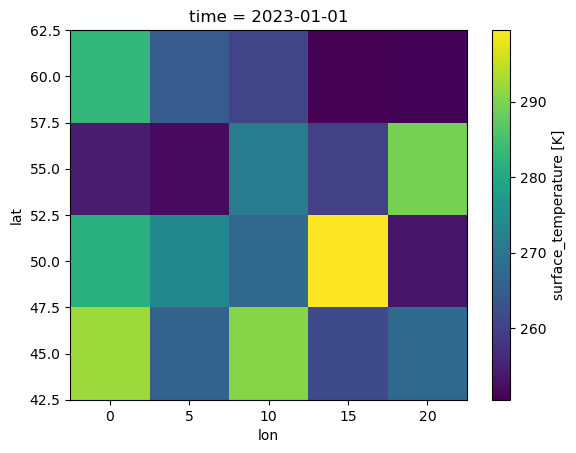

In [6]:
da1.isel(time=0).plot();

### Create the second xarray DataArray (i.e. the second variable)

In [7]:
#-- create a new DataArray by inheriting the attributes, dims, coords from da1
da2 = da1.copy(data=mydata1**2)
#-- overwrite standardname inherited from da1
da2.attrs["standard_name"]= 'carbon_flux'         

### Convert the DataArrays into a DataSet

In [8]:
ds = xr.Dataset({'temp': da1, 'carbon_flux': da2})

### Look at the DataSet

In [9]:
ds

<xarray.Dataset>
Dimensions:      (time: 2, lat: 4, lon: 5)
Coordinates:
  * time         (time) <U10 '2023-01-01' '2023-01-02'
  * lat          (lat) float64 45.0 50.0 55.0 60.0
  * lon          (lon) float64 0.0 5.0 10.0 15.0 20.0
Data variables:
    temp         (time, lat, lon) float64 292.3 266.0 290.6 ... 298.9 256.7
    carbon_flux  (time, lat, lon) float64 8.542e+04 7.075e+04 ... 6.589e+04

----

## Xarray functions/methods


<br>

### `where` - to mask data

Similar to the NumPy `where` function, Xarray provides a `where` function that uses a condition to filter the data.  
You can filter the data by data value range or by a condition related to a dimension for instance.


In [10]:
# For simplicity, extract the data of intest from your Dataset to apply the masking

In [11]:
var = ds.temp.sel(time="2023-01-02")
var

<xarray.DataArray 'temp' (lat: 4, lon: 5)>
array([[265.41327346, 275.31406289, 251.84136738, 253.70406739,
        266.07577294],
       [250.25539756, 273.15367259, 274.24760139, 271.0449651 ,
        273.2598477 ],
       [260.19315986, 297.7809905 , 279.57672522, 285.97109257,
        262.86998454],
       [282.60551554, 261.39996982, 295.69088021, 298.94775813,
        256.68318152]])
Coordinates:
    time     <U10 '2023-01-02'
  * lat      (lat) float64 45.0 50.0 55.0 60.0
  * lon      (lon) float64 0.0 5.0 10.0 15.0 20.0
Attributes:
    units:          K
    standard_name:  surface_temperature

### Filter data by data range using combined condition

In [12]:
var.where((var > 273.15) & (var < 300.))

<xarray.DataArray 'temp' (lat: 4, lon: 5)>
array([[         nan, 275.31406289,          nan,          nan,
                 nan],
       [         nan, 273.15367259, 274.24760139,          nan,
        273.2598477 ],
       [         nan, 297.7809905 , 279.57672522, 285.97109257,
                 nan],
       [282.60551554,          nan, 295.69088021, 298.94775813,
                 nan]])
Coordinates:
    time     <U10 '2023-01-02'
  * lat      (lat) float64 45.0 50.0 55.0 60.0
  * lon      (lon) float64 0.0 5.0 10.0 15.0 20.0
Attributes:
    units:          K
    standard_name:  surface_temperature

### Filter by a condition related to a dimension

In [13]:
var.where(var.lon > 10.).data

array([[         nan,          nan,          nan, 253.70406739,
        266.07577294],
       [         nan,          nan,          nan, 271.0449651 ,
        273.2598477 ],
       [         nan,          nan,          nan, 285.97109257,
        262.86998454],
       [         nan,          nan,          nan, 298.94775813,
        256.68318152]])

<br>

### `isnull` - check where missing values exist

It returns a mask of True/False elements. 

Our _var_ variable does not contain missing values. We now define those values as missing if they are below 273.15.


In [14]:
var = var.where(var < 273.15)

In [15]:
var.isnull()

<xarray.DataArray 'temp' (lat: 4, lon: 5)>
array([[False,  True, False, False, False],
       [False,  True,  True, False,  True],
       [False,  True,  True,  True, False],
       [ True, False,  True,  True, False]])
Coordinates:
    time     <U10 '2023-01-02'
  * lat      (lat) float64 45.0 50.0 55.0 60.0
  * lon      (lon) float64 0.0 5.0 10.0 15.0 20.0

<br>

### `count` - count valid values


Count the data that are not missing values.

In [16]:
var.count().values    #-- with .values, the output will be printed as xarray DataArray 

array(10)

### `notnull` - check where valid ("non-missing") values

To check where valid  ("non-missing") values are present, use `notnull`.


In [17]:
var.notnull().values

array([[ True, False,  True,  True,  True],
       [ True, False, False,  True, False],
       [ True, False, False, False,  True],
       [False,  True, False, False,  True]])

<br>

### `fillna` - change missing value to a constant number

In [18]:
var.fillna(-999).values

array([[ 265.41327346, -999.        ,  251.84136738,  253.70406739,
         266.07577294],
       [ 250.25539756, -999.        , -999.        ,  271.0449651 ,
        -999.        ],
       [ 260.19315986, -999.        , -999.        , -999.        ,
         262.86998454],
       [-999.        ,  261.39996982, -999.        , -999.        ,
         256.68318152]])

<br>

### `min(), max(), mean(), sum(), std(), corr(), ...`

Xarray provides a lot of computational functions.


In [19]:
print(f'min = {ds.temp.min().values:6.2f},  max = {ds.temp.max().values:6.2f}')

min = 250.26,  max = 299.50


In [20]:
print(f'std = {ds.temp.std().values:6.2f}')

std =  14.71


<br>

# Exercise 1

Use the precip data from the ../data/rectilinear_grid_2D.nc file:

1. compute the mean of the variable precip over 'time' and plot it
1. plot only the precip data > 0.0001
1. how many non-missing values exist (exercise # 2.)
1. compute the mean of the variable precip over ('lat','lon') and plot it


In [21]:
# 1.


In [22]:
# 2.


In [23]:
# 3.


<br>

## Solution Exercise 1


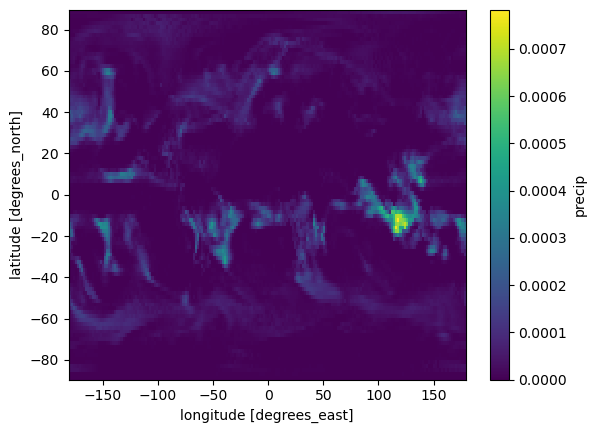

In [24]:
# 1. 
ds2 = xr.open_dataset('../data/rectilinear_grid_2D.nc')
ds2
precip = ds2.precip
precip_mean = precip.mean('time')
precip_mean.plot()

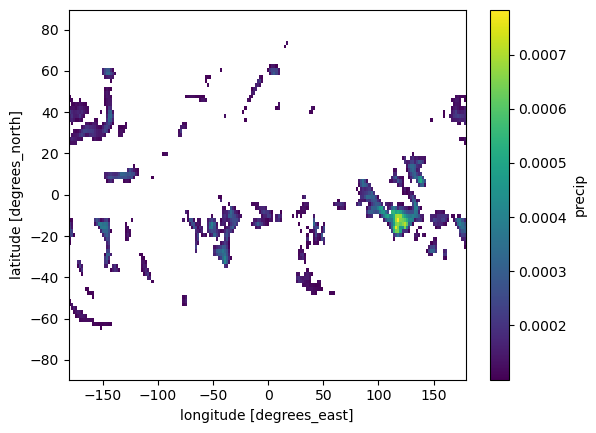

In [25]:
# 2.

precip_mean.where(precip_mean > 0.0001).plot()

In [26]:
# 3.

print(precip_mean.count().data)

18432


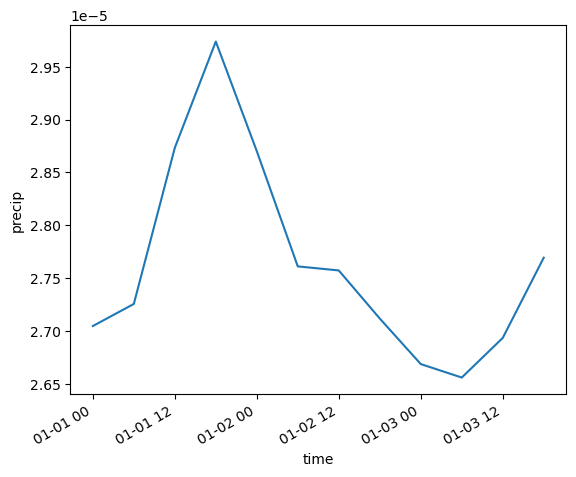

In [27]:
# 4.

precip_fldmean = precip.mean(('lat','lon'))
precip_fldmean.plot()

----

# Exercise 2

Global mean
1. 
- Use the variable tsurf from ds2 and compute the global (spatial) mean for each time step
- Hint: compute the mean along the coordinates lat and lon

2. 
Plot the result as line plot

In [28]:
#1



In [29]:
#2



<br>

## Solution Exercise 2


In [30]:
#1
tsurf           = ds2.tsurf
day_spatialmean = tsurf.mean(dim=['lon','lat'])
day_spatialmean

<xarray.DataArray 'tsurf' (time: 12)>
array([276.7597 , 276.85114, 277.39627, 277.4052 , 277.10522, 277.03012,
       277.35452, 277.20374, 276.7918 , 276.6943 , 277.06384, 276.95425],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 ... 2001-01-03T18:00:00

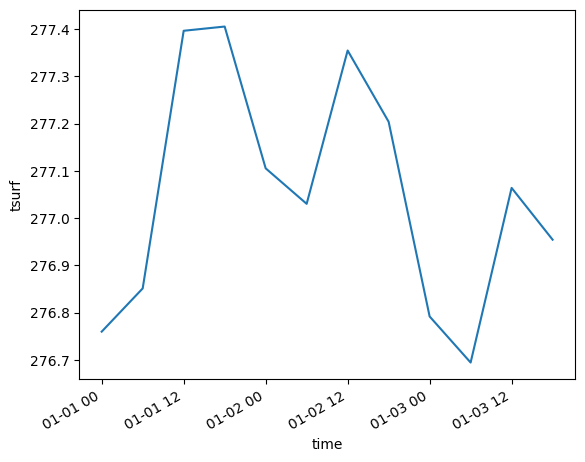

In [31]:
#2
day_spatialmean.plot()

----

# Advanced Xarray Example: Climatology 

For our next example we use a historical and scenario dataset from CMIP6 that contain more time steps.

In [32]:
dir_data  = "../data/"
# historical data
fnameh = "hist_em_LR_temp_subset_1980-2000.nc"
# scenario data
fname  = "ssp245_em_LR_temp_subset_2070-2100.nc"

### Extract some time period

First, we a historical CMIP6 temperature dataset that covers 20-year time range (1980-2000).

In [33]:
dsh = xr.open_dataset(dir_data + fnameh)

### Compute monthly means

Xarray allows us to group the time steps monthly-wise with the `groupby` method and compute the monthly means. 

In [34]:
clim_xr = dsh.groupby('time.month').mean()


### Compute the are weights
To account for the different grid cell sizes, we calculate the variable weighted this time.


In [35]:
weights = np.cos(np.deg2rad(dsh.lat))

Compute the weighted data.

In [36]:
clim_xr_wgt = clim_xr.weighted(weights)

Compute the spatial mean.

In [37]:
clim_xr_mean = clim_xr_wgt.mean(('lat','lon'))

### Plot the result.

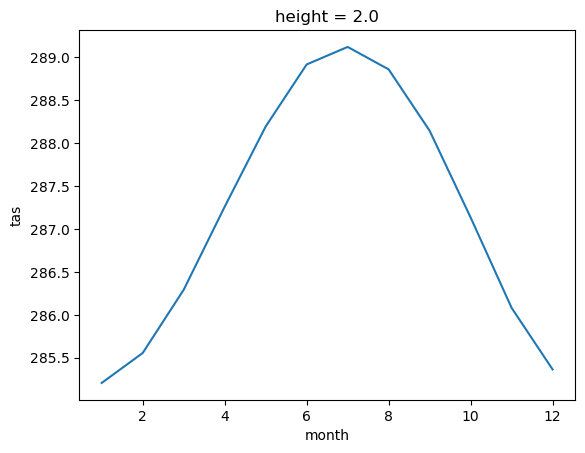

In [38]:
clim_xr_mean.tas.plot()

## Anomaly

Open a CMIP6 scenario file and extract the time range 2080-2100.

In [39]:
ds = xr.open_dataset(dir_data + fname)
ds = ds.sel(time=slice('2080-01-01','2100-12-31'))

Compute the spatial mean of the weighted data.

In [40]:
tas_xr_wgt = ds.tas.weighted(weights).mean(('lat','lon'))

Compute the anomaly. This is done by subtracting the monthly climatology from the monthly grouped data.

In [41]:
anom_xr = tas_xr_wgt.groupby('time.month') - clim_xr_mean

Compute the yearly means.

In [42]:
anom_xr_ymean = anom_xr.resample(time='Y').mean()

Plot the result.

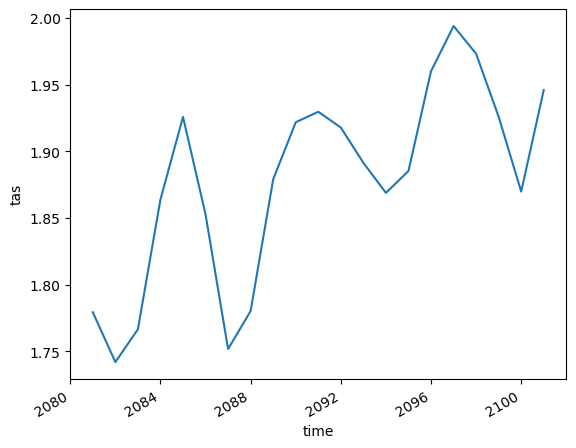

In [43]:
anom_xr_ymean.tas.plot()

<br>

----
----

See also:

- Project Pythia Computations and Masks with Xarray https://foundations.projectpythia.org/core/xarray/computation-masking.html
- Tutorials and Videos https://docs.xarray.dev/en/stable/tutorials-and-videos.html
- DKRZ tutorials https://data-infrastructure-services.gitlab-pages.dkrz.de/tutorials-and-use-cases/Tutorials.html
- Pangeo Xarray Tutorial http://gallery.pangeo.io/repos/pangeo-data/pangeo-tutorial-gallery/xarray.html
- Copernicus https://ecmwf-projects.github.io/copernicus-training-c3s/reanalysis-climatology.html#anomaly-calculation
